# Task 05: Viral Tweets Prediction Challenge

# Lendo os dados:

In [1]:
import pandas as pd

**Usuários:**

In [2]:
users = pd.read_csv(r"C:\Users\avale\Users\users.csv", header=(0)) #Users data
user_desc = pd.read_csv(r"C:\Users\avale\Users\user_vectorized_descriptions.csv", header=(0)) #Users description data
user_img = pd.read_csv(r"C:\Users\avale\Users\user_vectorized_profile_images.csv", header=(0)) #Users profile images data

**Treino:**

In [3]:
tt = pd.read_csv(r"C:\Users\avale\Tweets\train_tweets.csv", header=(0)) #Tweets train 
tt_media = pd.read_csv(r"C:\Users\avale\Tweets\train_tweets_vectorized_media.csv", header=(0)) #Tweets media train
tt_text = pd.read_csv(r"C:\Users\avale\Tweets\train_tweets_vectorized_text.csv", header=(0)) #Tweets text train

**Teste:**

In [4]:
tt_test = pd.read_csv(r"C:\Users\avale\Tweets\test_tweets.csv", header=(0)) #Tweets test
tt_media_test = pd.read_csv(r"C:\Users\avale\Tweets\test_tweets_vectorized_media.csv", header=(0)) #Tweets media test
tt_text_test = pd.read_csv(r"C:\Users\avale\Tweets\test_tweets_vectorized_text.csv", header=(0)) #Tweets text test

# Conhecendo os dados: 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [6]:
tt

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,tweet_attachment_class,tweet_language_id,tweet_topic_ids,virality
0,34698,10,2015,12,5,3,2.0,1.0,0.0,False,C,0,"['36', '36', '36', '36', '36', '36', '37', '37...",3
1,24644,4,2020,6,19,0,0.0,1.0,0.0,False,C,0,"['43', '78', '79', '80', '80', '89', '98', '99...",3
2,36321,54,2019,6,2,15,2.0,3.0,0.0,True,A,0,"['79', '80', '98', '98', '98', '99', '99', '10...",1
3,2629,42,2020,9,6,17,0.0,1.0,1.0,True,A,0,"['43', '79', '80', '98', '99', '99', '79', '80']",2
4,28169,32,2020,11,4,17,2.0,1.0,0.0,True,A,0,"['79', '80', '98', '99', '43', '89']",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29620,24846,4,2019,8,30,17,0.0,1.0,0.0,True,A,0,"['78', '79', '80', '98', '99', '100', '78', '7...",3
29621,7320,21,2018,12,21,13,2.0,1.0,0.0,True,A,0,"['98', '99', '100']",2
29622,7447,21,2018,9,29,18,0.0,1.0,0.0,True,A,0,"['98', '99', '100']",2
29623,26737,41,2017,2,5,16,0.0,2.0,0.0,True,A,0,NaN,2


**Viralidade:**

In [7]:
tt['virality'].describe()

count    29625.000000
mean         1.907274
std          1.078700
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: virality, dtype: float64

In [8]:
tt['virality'].value_counts()

1    13632
2     8889
3     4646
5     1323
4     1135
Name: virality, dtype: int64

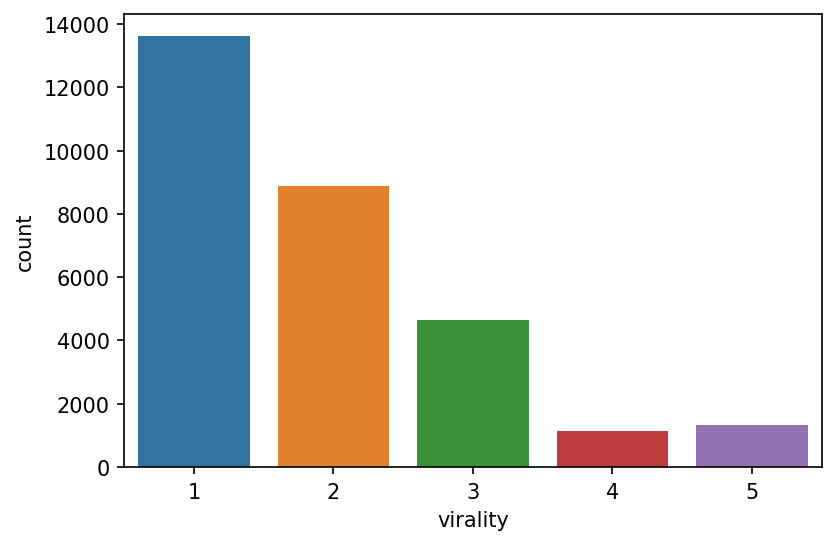

In [9]:
figure(figsize=(6, 4), dpi=150)
sns.countplot(x = 'virality', data = tt)

*Podemos observar que a nossa coluna target se divide em 5 níveis, supondo que o nível 1 identifique a menor viralidade, enquanto o nível 5 nos indica a maior viralidade.*

**Observando a viralidade média por usuário:**

In [10]:
viral_mean = tt.groupby('tweet_user_id').agg(pd.Series.mean)['virality']
viral_mean.sort_values(ascending=False)

tweet_user_id
50    4.469775
4     3.279801
40    3.202037
12    3.195079
35    3.190556
33    3.060345
32    3.032316
28    2.957045
30    2.798680
38    2.769625
10    2.708861
7     2.693780
46    2.439446
24    2.343333
49    2.120069
27    2.075571
11    2.067912
21    2.054329
41    2.042904
42    1.970940
31    1.929915
22    1.902685
47    1.782531
1     1.717082
54    1.714754
2     1.610837
14    1.587719
16    1.577250
6     1.570234
39    1.543058
15    1.504886
8     1.492119
13    1.468908
37    1.452206
53    1.382838
18    1.340830
20    1.339374
0     1.306644
43    1.293624
44    1.262626
17    1.258765
23    1.250831
48    1.240137
55    1.232432
52    1.192893
45    1.154229
5     1.127303
3     1.105903
34    1.101523
26    1.083752
19    1.082312
25    1.061947
Name: virality, dtype: float64

In [11]:
viral_mean.describe()

count    52.000000
mean      1.906626
std       0.776963
min       1.061947
25%       1.285875
50%       1.599278
75%       2.367362
max       4.469775
Name: virality, dtype: float64

[(1, 5)]

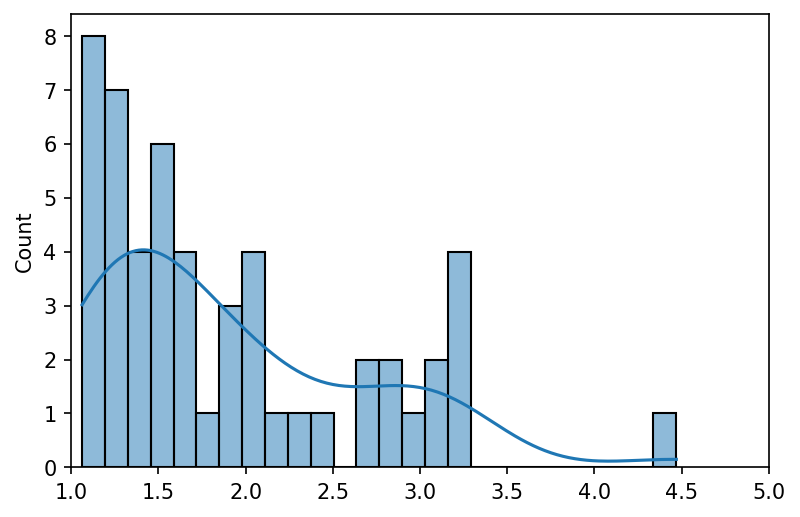

In [12]:
figure(figsize=(6, 4), dpi=150)
sns.histplot(viral_mean.values,kde=True, bins=26).set(xlim=(1, 5))

C:\Users\avale\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


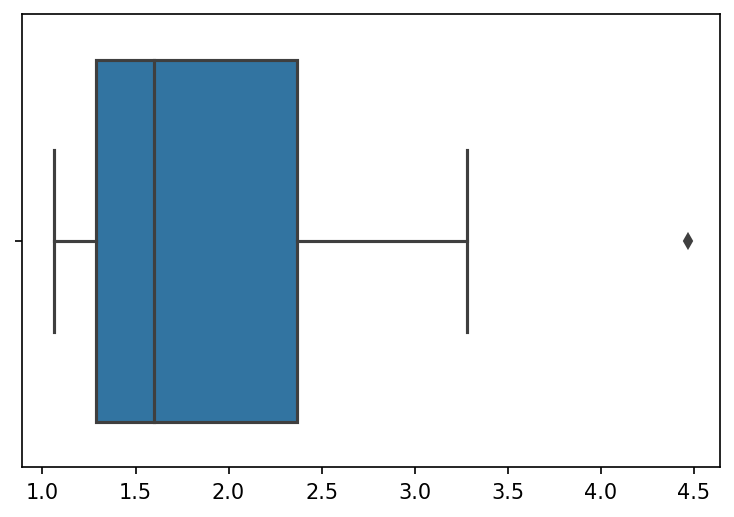

In [13]:
#boxplot da viralidade média
figure(figsize=(6, 4), dpi=150)
sns.boxplot(viral_mean.values)

*Vemos que a maioria dos usuários tem viralidade média menor que 3 e há um outlier relativamente distante do limite superior do boxplot.*

*Obs: não podemos utilizar esses dados como feaeture pois eles contêm "informação privilegiada".*

**Datas:**

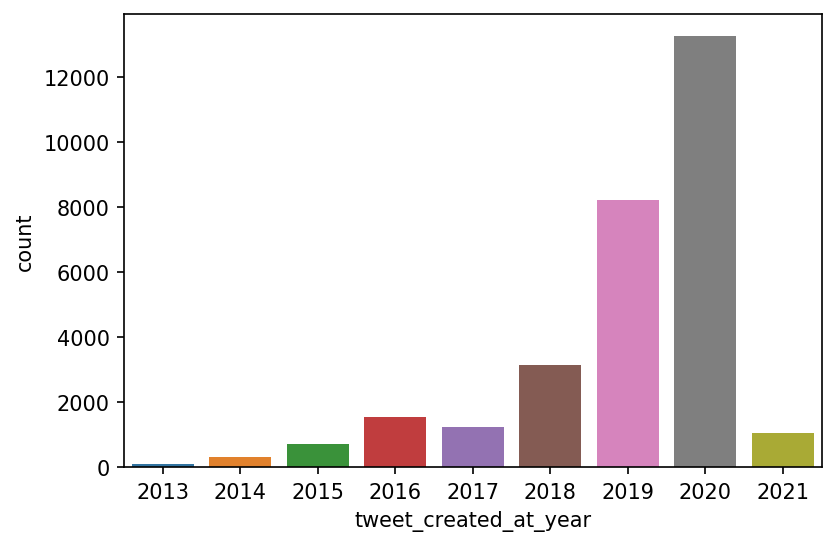

In [14]:
figure(figsize=(6, 4), dpi=150)
sns.countplot(x = 'tweet_created_at_year', data = tt)

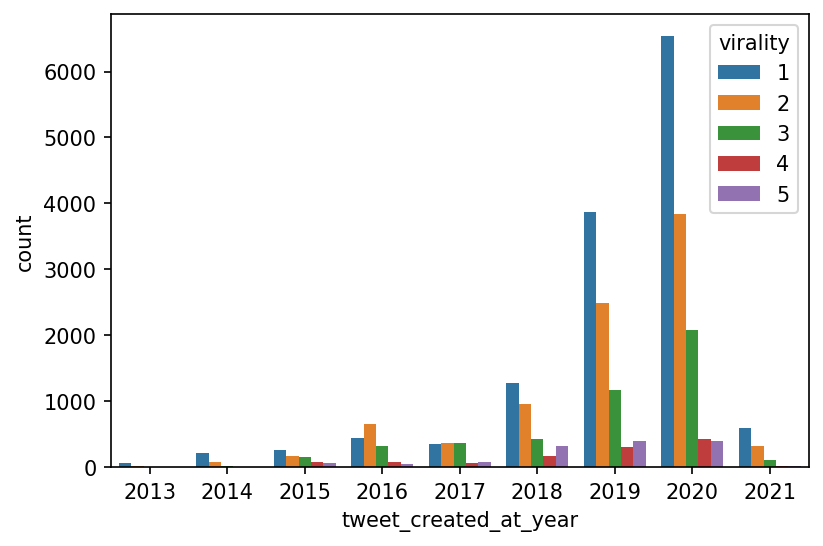

In [15]:
# em função da viralidade
figure(figsize=(6, 4), dpi=150)
sns.countplot(x = 'tweet_created_at_year', data = tt, hue='virality')

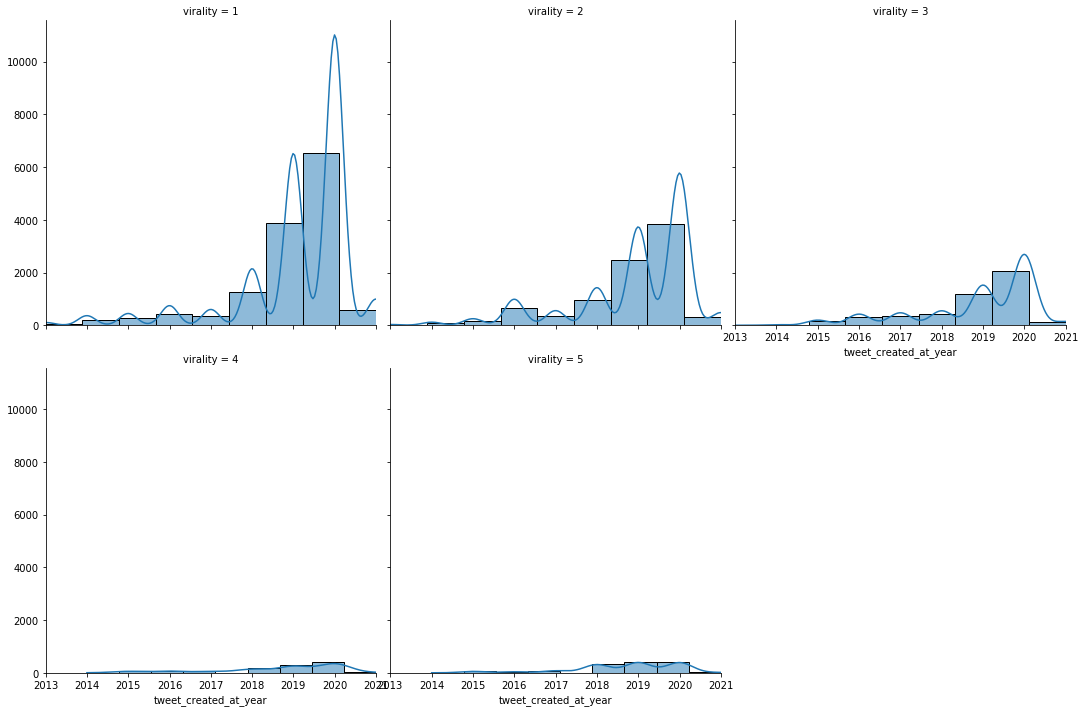

In [16]:
#plotando separadamente em função da viralidade para uma melhor observação
g = sns.FacetGrid(tt, col="virality", col_wrap=3, height=5)
g.map(sns.histplot,"tweet_created_at_year", kde=True, bins=9).set(xlim=(2013, 2021))

*Vemos que a maioria dos dados é recente e a maior concentração de altas viralidades é entre 2018 e 2020.*

**Horários:**

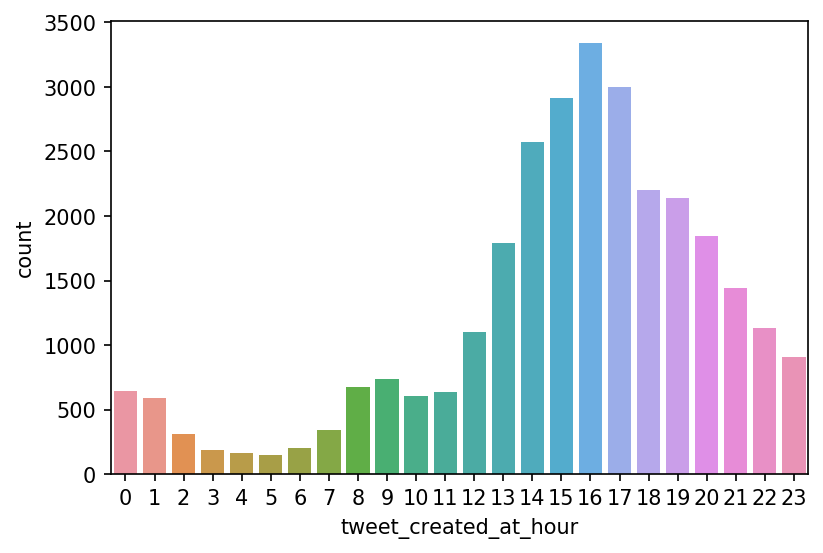

In [17]:
figure(figsize=(6, 4), dpi=150)
sns.countplot(x = 'tweet_created_at_hour', data = tt)

[(0, 23)]

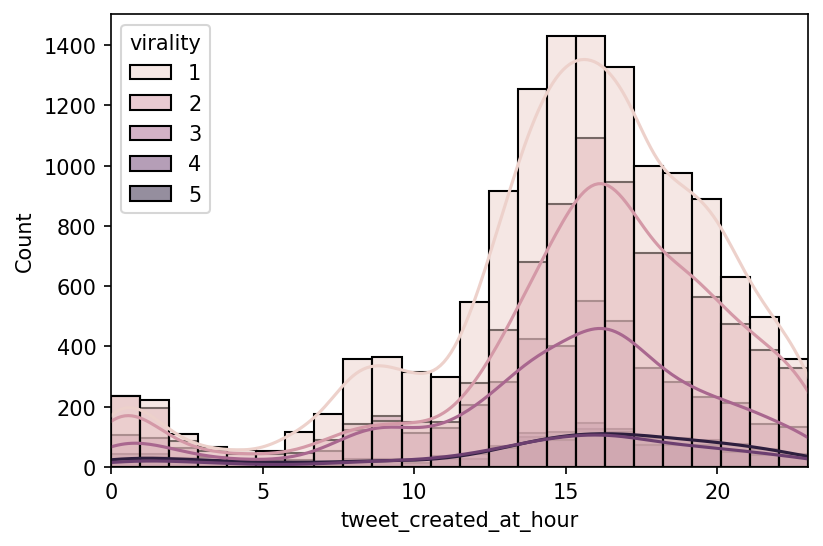

In [18]:
figure(figsize=(6, 4), dpi=150)
sns.histplot(x = 'tweet_created_at_hour', data = tt, hue='virality',kde=True, bins=24).set(xlim=(0,23))

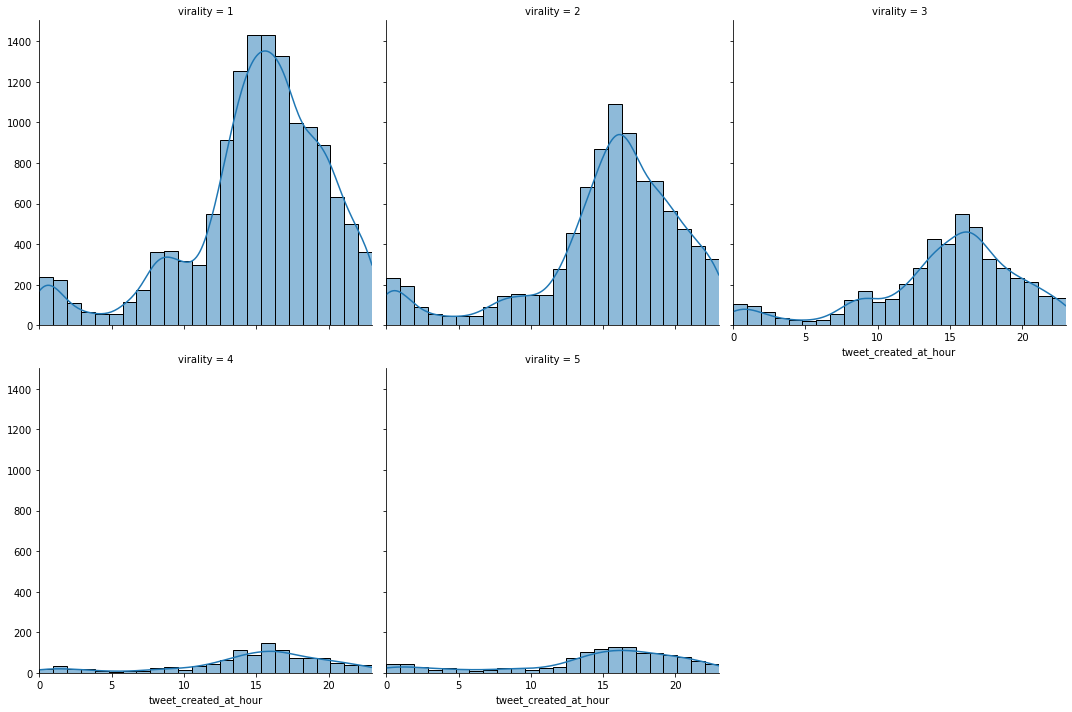

In [19]:
#plotando separadamente em função da viralidade para uma melhor observação
g = sns.FacetGrid(tt, col="virality", col_wrap=3, height=5)
g.map(sns.histplot,"tweet_created_at_hour", kde=True, bins=24 ).set(xlim=(0, 23))

*Vemos que os tweets são postados majoritariamente nos horários da Tarde/Noite, e que a viralidade também segue isso.*

# Tratamentos:

## Foto de perfil e descrição:

Por se tratarem de dados "voláteis" , no sentido de que podem ser, e de fato são, alterados com muita frequência, não utilizaremos a foto de perfil e descrição do usuário nesse primeiro estudo, pois sem técnicas de Processamento de Linguagem Natural e Processamento de Imagem será difícil extrair conteúdo compreensível desses dados, e tendo em consideração que não sabemos como os dados foram vetorizados não acho prudente utilizar o valor das features como numéricos.

*Obs: Mídias podem se referir também a vídeos, gifs etc, não estando restritas apenas à imagens.*

Caso a importância dessas features seja compravada futuramente, voltaremos atrás e as analisaremos melhor, levando em consideração que a sua adição ao estudo nos impactará com um custo computacional mais elevado.

## Mídia:

Devido à dificuldade em extrair conteúdos, contextos ou significados explicáveis das mídias vetorizadas dos tweets, como sugerido em aula, optamos por apenas extrairmos o número de mídias de cada tweet desse conjunto de dados e descartarmos o resto, contudo, estamos dispostos a rever tal decisão, e analisar melhor a situação, caso o resultado final não seja próximo ao esperado.   

Para conseguirmos adicionar o número de mídias por tweet no nosso conjunto, primeiro precisamos criar um dataframe indexado pelo 'tweet_id':

In [20]:
num_img = tt_media['tweet_id'].value_counts()#serie com os valores de medias por 'tweet_id'
num_img_df = pd.DataFrame(num_img)#criando um dataframe para armazenar os valores
num_img_df = num_img_df.reset_index()#fazendo o index('tweet_id') passar a ser coluna no dataframe
num_img_df = num_img_df.rename(columns={'index':'tweet_id', 'tweet_id':'num_img'})#renomeando as colunas para o padrão
num_img_df

,tweet_id,num_img
0,27534,4
1,19277,4
2,1315,4
3,41103,4
4,30331,4
...,...,...
17431,31493,1
17432,29444,1
17433,19203,1
17434,17154,1


In [21]:
#fazendo o mesmo para os dados de teste
num_img_test = tt_media_test['tweet_id'].value_counts()#serie com os valores de medias por 'tweet_id'
num_img_df_test = pd.DataFrame(num_img_test)#criando um dataframe para armazenar os valores
num_img_df_test = num_img_df_test.reset_index()#fazendo o index('tweet_id') passar a ser coluna no dataframe
num_img_df_test = num_img_df_test.rename(columns={'index':'tweet_id', 'tweet_id':'num_img'})#renomeando as colunas para o padrão
num_img_df_test

,tweet_id,num_img
0,1270,4
1,28608,4
2,35028,4
3,28267,4
4,36571,4
...,...,...
7470,37287,1
7471,41385,1
7472,22958,1
7473,10672,1


Juntando os dados gerados com o dataset de tweets:

In [22]:
tt = tt.merge(num_img_df, on = "tweet_id", how = "left") #merge para os dados de treino
tt_test = tt_test.merge(num_img_df_test, on = "tweet_id", how = "left") #merge para os dados de teste

Na nova coluna implantada no dataset, os valores que não deram match com valores já existentes de 'tweet_id's foram colocados como NaN, iremos substituí-los por '0':

In [23]:
tt['num_img'].fillna(0, inplace=True) #substituindo nos dados de treino
tt_test['num_img'].fillna(0, inplace=True) #substituindo nos dados de teste

In [24]:
print(tt.shape)
print(tt_test.shape)

(29625, 15)
(12697, 14)


*Observamos que o número de tuplas não foi alterado em nenhum dos dados de treino ou teste, o que nos indica que o nosso 'merge' foi bem sucedido.*

## Topic_id:

In [25]:
tt['tweet_topic_ids']

0        ['36', '36', '36', '36', '36', '36', '37', '37...
1        ['43', '78', '79', '80', '80', '89', '98', '99...
2        ['79', '80', '98', '98', '98', '99', '99', '10...
3         ['43', '79', '80', '98', '99', '99', '79', '80']
4                     ['79', '80', '98', '99', '43', '89']
                               ...                        
29620    ['78', '79', '80', '98', '99', '100', '78', '7...
29621                                  ['98', '99', '100']
29622                                  ['98', '99', '100']
29623                                                  NaN
29624    ['156', '79', '80', '80', '81', '81', '98', '99']
Name: tweet_topic_ids, Length: 29625, dtype: object

In [26]:
tt['tweet_topic_ids'].isna().value_counts() #valores faltantes

False    25340
True      4285
Name: tweet_topic_ids, dtype: int64

Essa feature tem muitos valores faltantes que não temos uma forma eficiente de tratar, então, para não perdermos 4285 tuplas, iremos dropar a coluna.

In [27]:
tt = tt.drop(['tweet_topic_ids'],1) #dropando para o conjunto de treino
tt_test = tt_test.drop(['tweet_topic_ids'],1) #dropando para o conjunto de teste

## Merging:

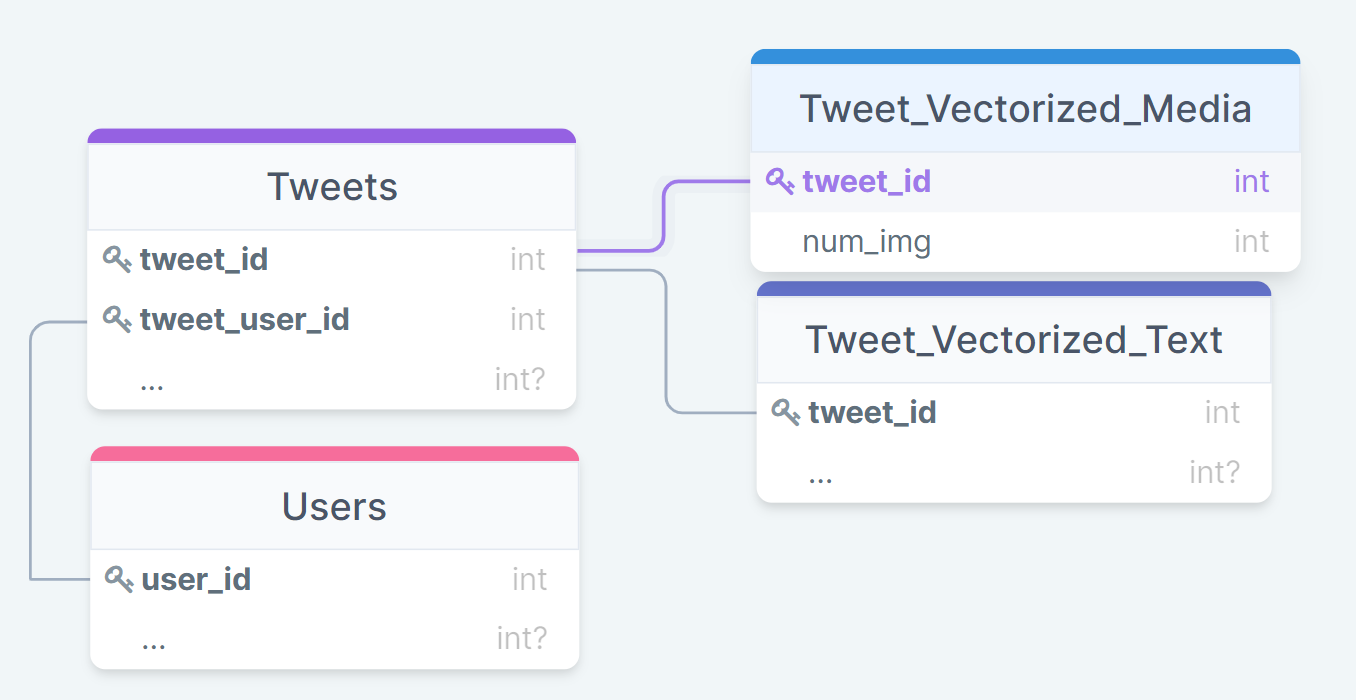

*Diagrama Entidade-Relacionamento feito para nos orientar quanto as chaves para o merge.*

Juntando os dados restantantes para a criação dos conjuntos finais:

In [28]:
tt = tt.merge(tt_text, on = "tweet_id", how = "left")
tt_test = tt_test.merge(tt_text_test, on = "tweet_id", how = "left")

In [29]:
data_train = pd.merge(tt, users, how='left', left_on='tweet_user_id', right_on='user_id')
data_test = pd.merge(tt_test, users, how='left', left_on='tweet_user_id', right_on='user_id')

In [30]:
print(data_train.shape)
print(data_test.shape)

(29625, 793)
(12697, 792)


*Observamos que o shape dos nossos conjuntos é o esperado em ambos conjuntos, o que nos indica que nosso 'merge' foi bem sucedido.*

# Observação do conjunto inteiro:

Após termos juntado as bases de dados, nos surge a aportunidade de analisarmos os dados como um todo.

Começando com alguns dados de usuários em função do target:

**Likes dos usuários:**

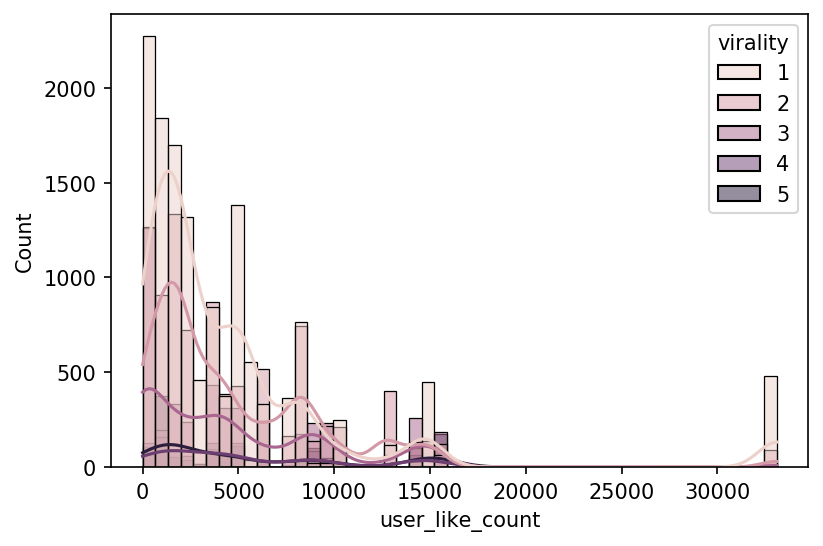

In [31]:
figure(figsize=(6, 4), dpi=150)
sns.histplot(x = 'user_like_count', data = data_train, hue='virality',kde=True, bins=50)

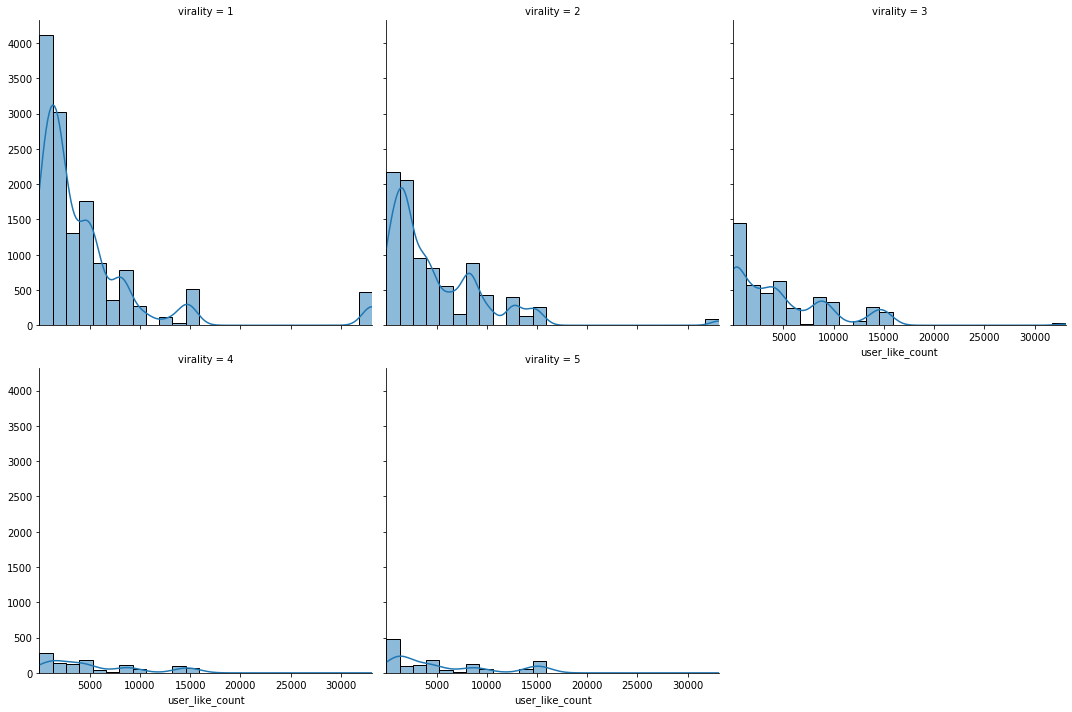

In [32]:
#plotando separadamente em função da viralidade para uma melhor observação
g = sns.FacetGrid(data_train, col="virality", col_wrap=3, height=5)
g.map(sns.histplot,"user_like_count", kde=True, bins=25 ).set(xlim=(1, data_train['user_like_count'].max()))

*Podemos ver que as contas dos usuários com mais likes não necessariamente têm maior viralidade, pelo contrário, pode-se dizer que a maior densidade se encontra num número menor de likes.*

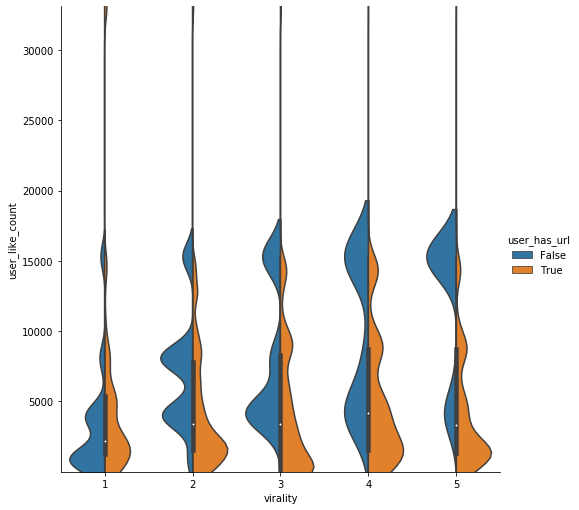

In [33]:
sns.catplot(data=data_train, kind="violin", x="virality", y="user_like_count", hue="user_has_url",height=7, split=True).set(ylim=(1, data_train['user_like_count'].max()))

Com o gráfico de violino acima, vemos que nas contagens mais altas de likes, aqueles sem URL tendem a ter uma viralidade maior que aqueles com URL.

**Seguidores por usuários:**

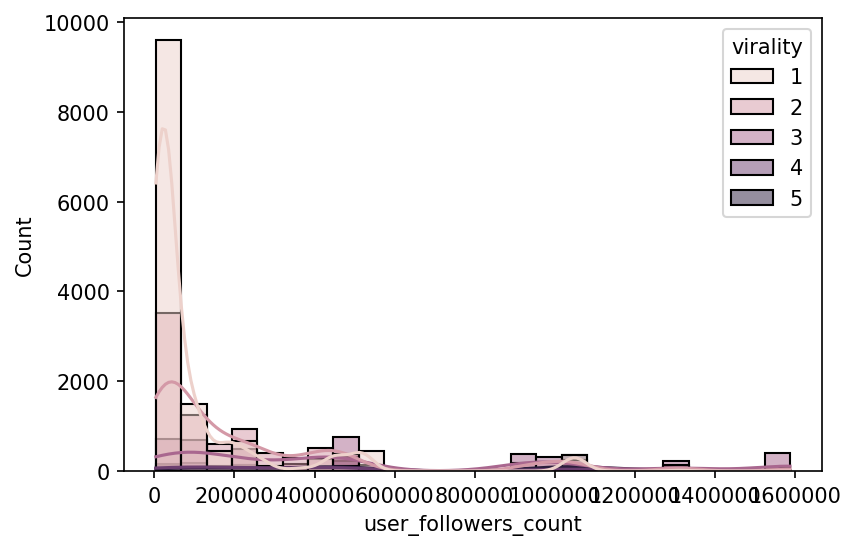

In [34]:
figure(figsize=(6, 4), dpi=150)
sns.histplot(x = 'user_followers_count', data = data_train, hue='virality', kde=True,bins=25)

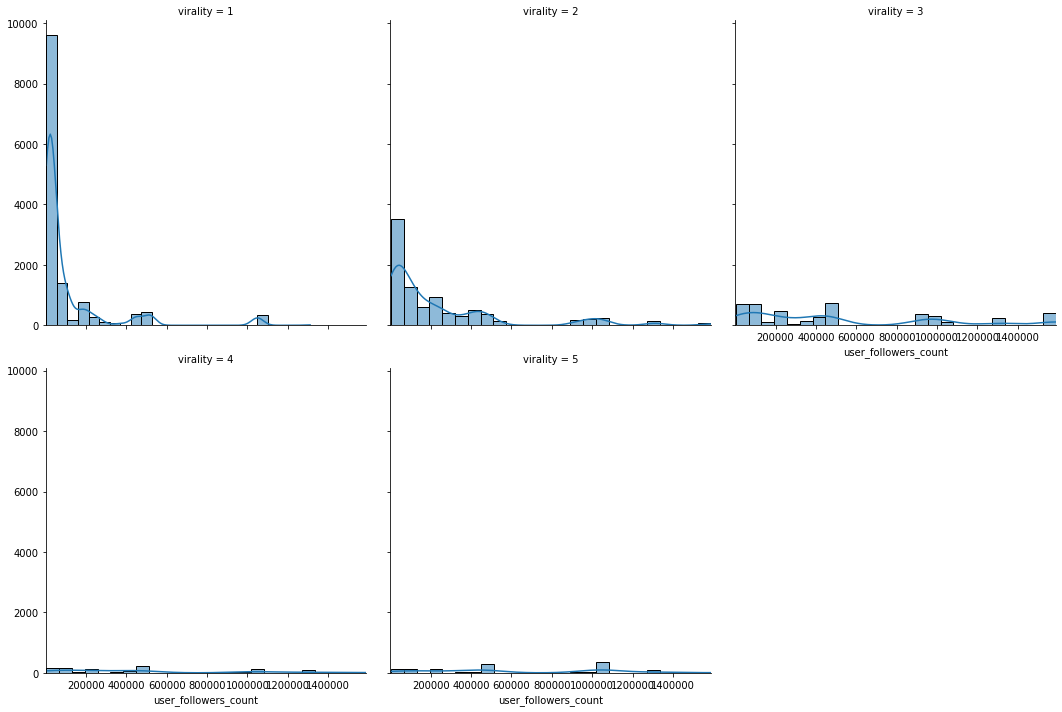

In [35]:
#plotando separadamente em função da viralidade para uma melhor observação
g = sns.FacetGrid(data_train, col="virality", col_wrap=3, height=5)
g.map(sns.histplot,"user_followers_count", kde=True, bins=25 ).set(xlim=(1, data_train['user_followers_count'].max()))

Vemos que a maioria dos usuários tem um número de seguidores pequeno, e que há um certo equilíbrio do número de seguidores nas viralidades mais altas, diferentemente das mais baixas. 

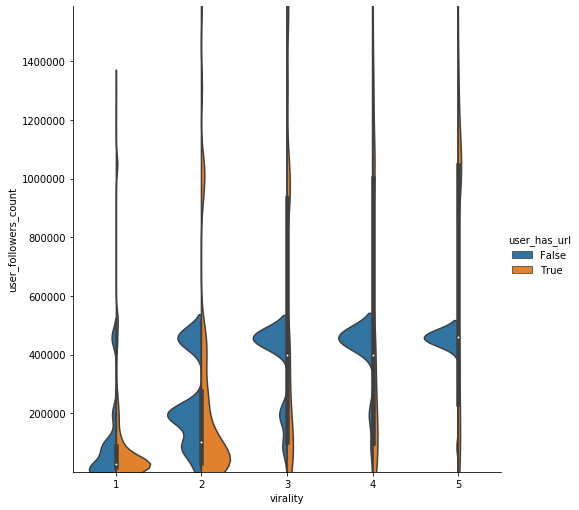

In [36]:
sns.catplot(data=data_train, kind="violin", x="virality", y="user_followers_count", hue="user_has_url",height=7, split=True).set(ylim=(1, data_train['user_followers_count'].max()))

Com base no gráfico de violino acima, vemos que com o aumento da viralidade, os usuários sem URL estão mais ficando mais condensados condensados entre 400mil e 600mil seguidores, enquanto enquanto os com URL estão ficando mais dispersos. 

## Correlação:

Text(0.5, 1.05, 'Correlation Matrix')

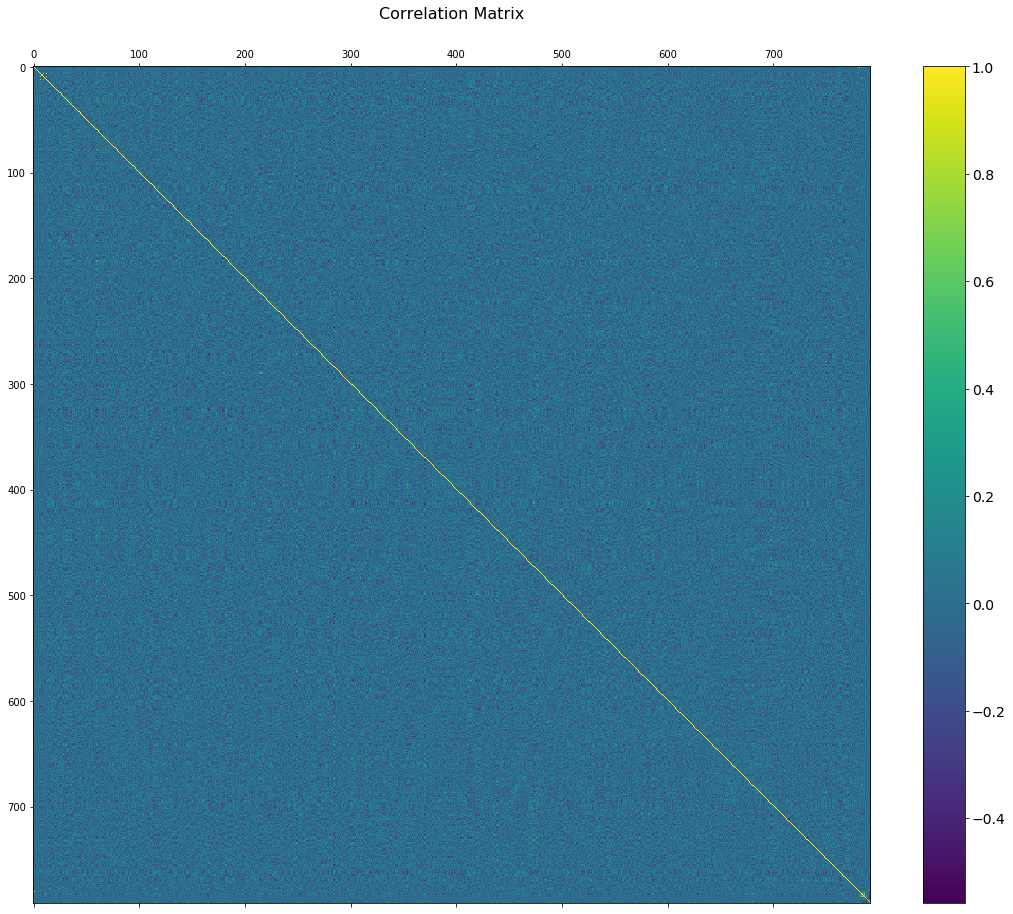

In [37]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data_train.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Aparentemente, não há correlações lineares altas, o que indica que nossas features não estão nos dandos informações similares, e com base nisso não devemos escolher alguma para descartar. 

## Encoding:

In [38]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [39]:
#para os dados de treino:
data_train["tweet_has_attachment"] = le.fit_transform(data_train["tweet_has_attachment"])
data_train["tweet_attachment_class"] = le.fit_transform(data_train["tweet_attachment_class"])
data_train["user_has_location"] = le.fit_transform(data_train["user_has_location"])
data_train["user_has_url"] = le.fit_transform(data_train["user_has_url"])

In [40]:
#para os dados de teste:
data_test["tweet_has_attachment"] = le.fit_transform(data_test["tweet_has_attachment"])
data_test["tweet_attachment_class"] = le.fit_transform(data_test["tweet_attachment_class"])
data_test["user_has_location"] = le.fit_transform(data_test["user_has_location"])
data_test["user_has_url"] = le.fit_transform(data_test["user_has_url"])

In [41]:
data_test

,tweet_id,tweet_user_id,tweet_created_at_year,tweet_created_at_month,tweet_created_at_day,tweet_created_at_hour,tweet_hashtag_count,tweet_url_count,tweet_mention_count,tweet_has_attachment,...,user_like_count,user_followers_count,user_following_count,user_listed_on_count,user_has_location,user_tweet_count,user_has_url,user_verified,user_created_at_year,user_created_at_month
0,6238,13,2020,7,26,10,5.0,2.0,0.0,1,...,2190,23349,825,2386,1,6462,1,0,2013,8
1,37458,14,2018,1,15,18,0.0,0.0,1.0,0,...,1655,12740,11865,1024,1,12572,1,0,2011,4
2,23968,50,2019,2,25,20,0.0,1.0,0.0,0,...,1311,1047277,174,25579,0,4589,1,0,2010,11
3,24137,50,2018,12,8,21,0.0,1.0,1.0,0,...,1311,1047277,174,25579,0,4589,1,0,2010,11
4,8064,30,2020,9,29,16,2.0,2.0,0.0,1,...,15,933000,13,14013,0,3841,1,0,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12692,2418,37,2016,3,21,18,1.0,0.0,1.0,0,...,8401,18216,6191,1455,1,22534,1,0,2011,6
12693,40872,12,2020,2,29,19,0.0,1.0,0.0,0,...,8698,1310481,211356,38838,1,145660,1,0,2008,2
12694,29847,38,2020,12,2,21,4.0,1.0,0.0,0,...,206,1000878,331,14247,0,2953,1,0,2013,5
12695,2939,42,2019,8,24,16,3.0,1.0,3.0,1,...,1124,276541,758,6163,1,3264,1,0,2011,9


## PCA:

In [42]:
ID = data_test['tweet_id'] #separando o ID do teste para o csv da submissão

In [43]:
X = data_train.drop(['virality', 'tweet_user_id', 'tweet_id', 'user_id'], axis=1)
y = data_train['virality']

data_test = data_test.drop(['tweet_user_id', 'tweet_id', 'user_id'], axis=1)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca.fit(X)

PCA(n_components=28)

Com base em resultados anteriores a criação desse notebook, sabiamos que o modelo sem nenhum dado vetorizado já conseguia uma performance em torno de 66% de acurácia, com aproximadamente 20 features, e como custo computacional era uma das nossas principais preocupações nesse trabalho (já que tudo estava sendo rodado localmente), optamos, com base nessa informação, por não utilizar a quantidade que descreve boa parte da variância dos dados, e sim o menor valor possível que nos entregasse uma boa melhora.

No intervalo de 25 a 30 componentes, nós obtivemos nosso objetivo, então escolhemos um número dentro desse intervalo.

In [45]:
X = pca.transform(X)

# Modelagem:

Foram feitos testes com diversos algoritmos, mas para não alongar desnecessáriamente esse estudo apresentamos apenas o com melhor performance.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [47]:
import yellowbrick as yb
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def predicao(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)


    accuracy = accuracy_score(y_test, preds)

    print("Acurácia %s" % (accuracy))

    figure(figsize=(6, 4), dpi=150)
    
    cm = ConfusionMatrix(model)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()  
    
    figure(figsize=(6, 4), dpi=150)
    visualizer = ClassificationReport(model)
    visualizer.fit(X_train, y_train)        
    visualizer.score(X_test, y_test)        
    visualizer.show()   

Acurácia 0.6827182718271827


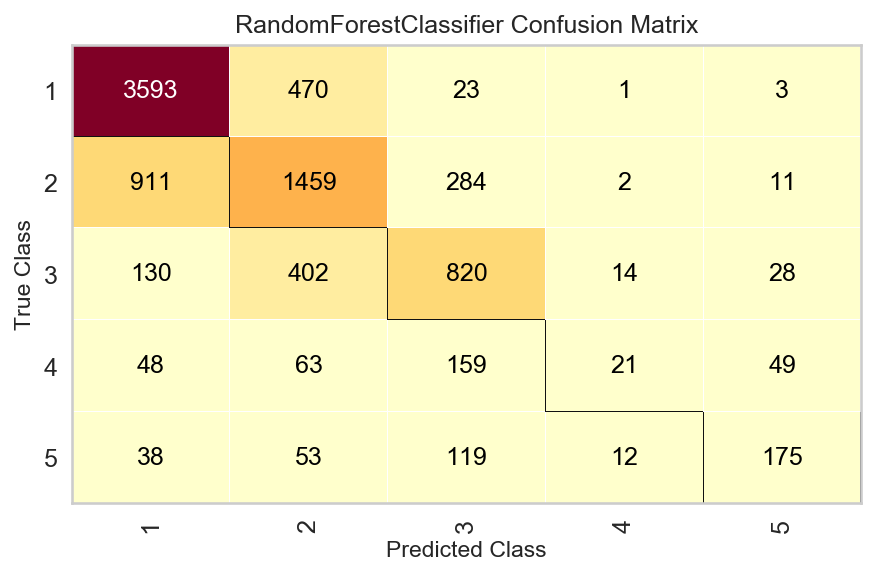

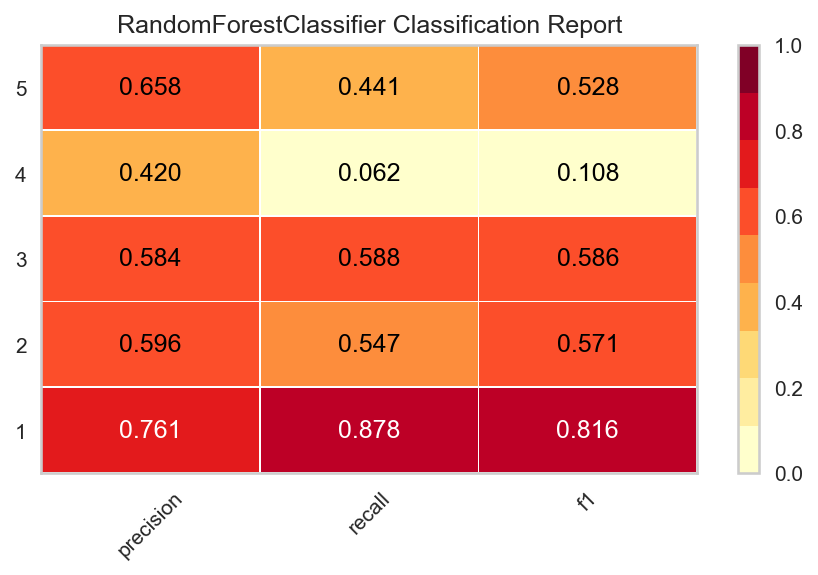

In [48]:
model = RandomForestClassifier()

predicao(model, X_train, y_train, X_test, y_test)

**Métricas:**
* Acurácia: Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente. É a soma da diagonal dividida pela soma de todos os elementos da matriz.

* Precisão: Mede o quanto o modelo acertou em relação aos dados preditos. É a quantidade de preditos corretamente dividida pela soma da coluna. 

        Ex: Precisão de 0.761 para a classe 1, indica que de todos que eu previ com classe 1, 76,1% estavam corretos.
       
* Recall(Sensibilidade): Mede o quanto o modelo acertou em relação à todos os dados pertencentes àquela classe. É a quantidade de preditos corretamente dividida pela soma da linha.

        Ex: Recall de 0.878 para a classe 1, indica que de todos os modelos que realmente pertencem a classe 1, 87,8% dos que previ estavam corretos.
    
* F1 score: É a média harmônica entre Precisão e Recall, normalmente usando quando se precisa de informação de ambas.

$$F1 = 2*\frac{Recall*Precision}{Recall+Precision}$$

# Conclusões:

__1. O modelo teve uma boa previsão da classe majoritária:__
 
* Precisão = 76,1%, Recall = 87,8%. Carregando a acurácia do modelo nas costas.

__2. O modelo tevo uma péssima previsão da classe minoritária (viralidade == 4):__
     
* O Recall da classe 4 foi de aproximadamente 6%. A princípio, pensamos que esse problema estivesse relacionado com a distribuição dos dados, que estava desbalanceada. Na tentativa de resolver isso, foi criado(em outro notebook) um novo modelo com SMOTE para balancear os dados igualmente, o que aumentou o Recall e diminuiu o Precisão da classe 4, porém diminuiu também os mesmos da classe majoritária, o que ocasionou numa perda de acurácia do modelo.

__3. A fronteira de decisão das classes minoritárias não foi satisfatória:__
* Os modelos em geral têm predito a classe 4 mais em qualquer outra classe do que a própria classe 4.
 
* Notamos que metade dos dos dados classe 4 eram preditos como classe 3, o que representa 800% em relação aos dados preditos corretamente como classe 4, o que se repete, porém em menor escala, na predição das demais classes minoritárias. Temos um comportamento similar nos modelos com SMOTE e outros diferentes algoritmos de classificação, o que talvez nos indique que o problema exposto no tópico anterior não seja em função da distribuição dos dados e sim uma característica do próprio conjunto de dados.

* Podemos argumentar sobre o método utilizado para classificar os níveis de viralidade, pois baseado nos modelos em que testamos, a classe 4 mais parece um extenção da classe 3. Também podemos nos indagar se o desafio não estaria melhor definido com apenas 3 ou 4 níveis de viralidade.

* Caso a classificação for realmente eficiente e a classe 4 seja realmente bem definida, podemos nos indagar se sua amostra, apresentada a nós pelos organizadores da competição, realmente representa bem a sua população.

__4. Mantemos o nosso posicionamento inicial em relação aos dados não utilizados dos usuários:__

* Analisando após o término do projeto, comparando com os modelos das demais equipes, estamos satifeitos com a decisão inicial de remover os dados das imagens de perfil e descrições dos usuários, pois só nos acrescentariam custo computacional sem ganhos visíveis.

# Submition on Bitgrit:

In [ ]:
data_test = pca.transform(data_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X,y)
predict = model.predict(data_test)

In [ ]:
predicoes = pd.DataFrame(data = {"tweet_id":ID, "virality":predict})

In [ ]:
predicoes.to_csv("resptest2.csv", index=False)

In [ ]:
fim = pd.read_csv('resptest2.csv')

In [ ]:
fim

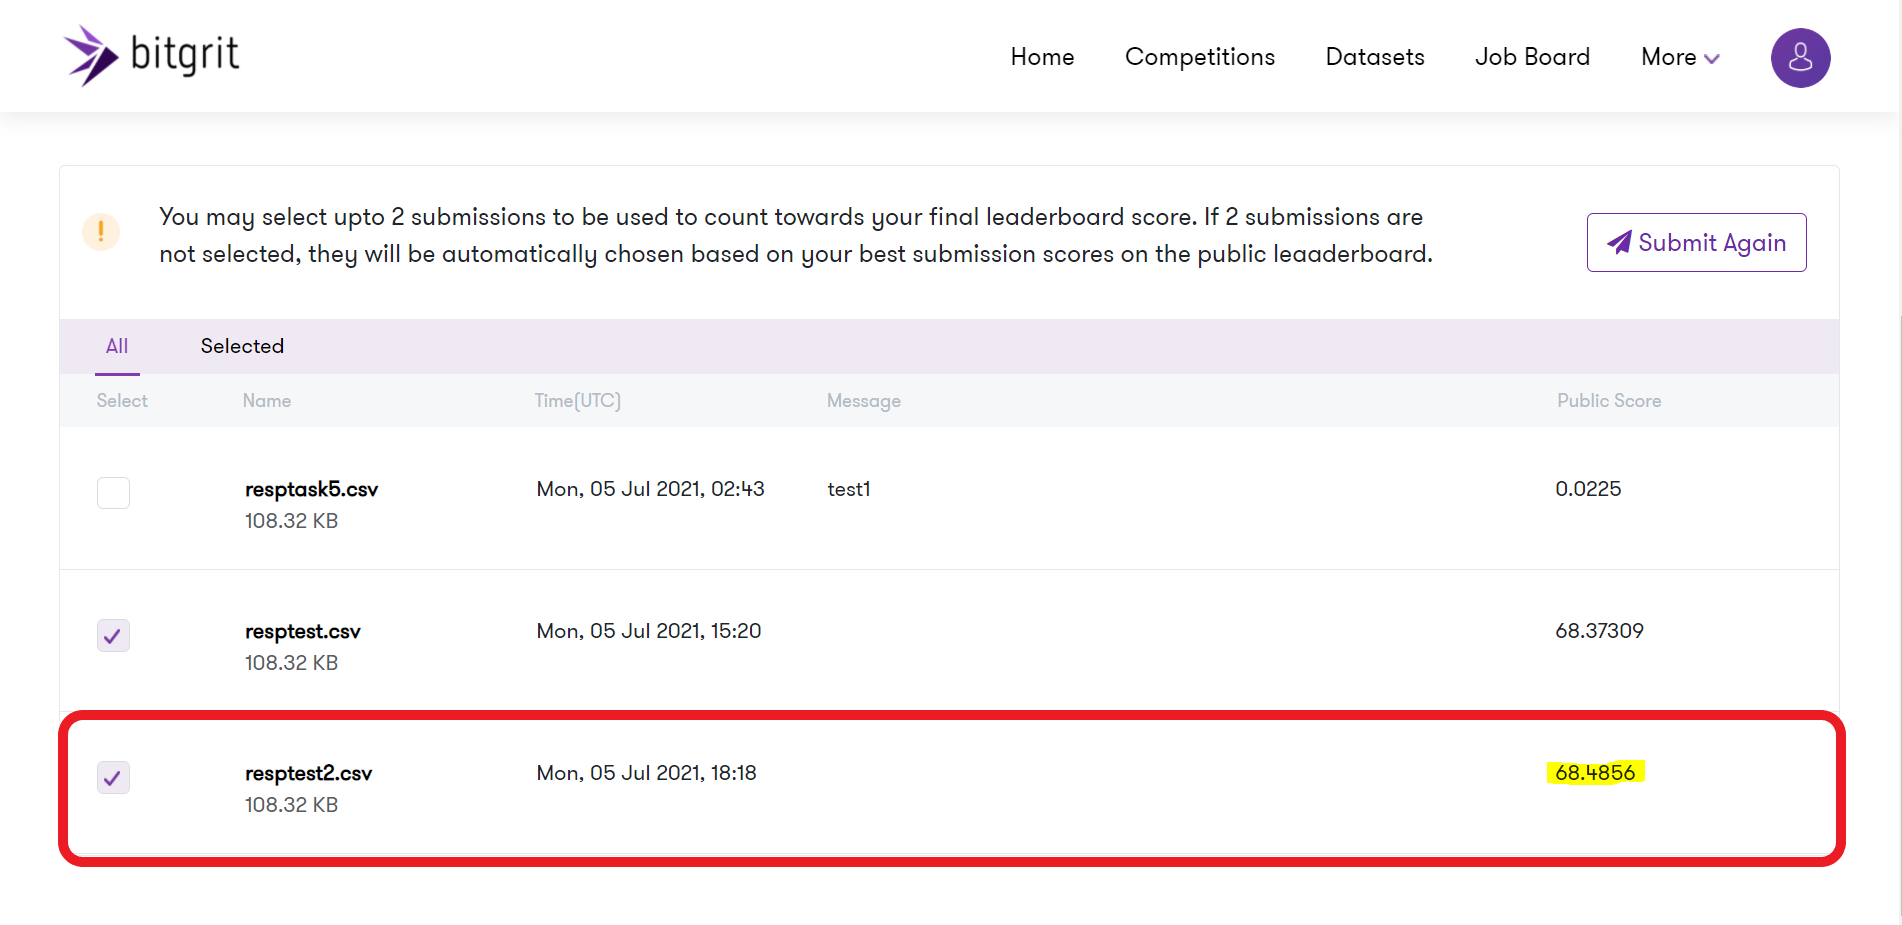

*Obs: A primeira submissão foi um erro.*

*Esse modelo teve acurácia **~68.5** no teste público do Bitgrit.*